# 01. Assignment_PatrickRodriguez

## Getting Started

The data set I am using is from: https://data.cityofnewyork.us/Environment/Electronics-Drop-Off-Locations-in-NYC/wshr-5vic/data_preview

Description:
A list of locations where NYC residents can drop off unwanted electronics. It's illegal in New York State to include electronic devices with trash or recycling. For more information on how to handle unwanted electronics in NYC, see: https://www.nyc.gov/site/dsny/collection/get-rid-of/electronics.page.


exported as a .shp file. Made sure to keep all the other subfiles together with the shape file in the same folder.

In [5]:
# the bare minimum
import matplotlib.pyplot as plt  # for plotting
import geopandas as gpd  # for geospatial data handling
from matplotlib.lines import Line2D

# more advanced
from lonboard._map import Map
from lonboard._layer import PolygonLayer  # for mapping in 3D
from lonboard.colormap import (
    apply_categorical_cmap,
    apply_continuous_cmap,
)  # for assigning colors
from palettable.colorbrewer.sequential import PuRd_9  # for color palettes
from matplotlib.colors import LogNorm  # for logarithmic normalization
import pygwalker as pyg  # for creating interactive data visualizations

# Load data



Here, we create a variable (`nycod`) and use geopandas to read the file into memory. We use a "relative" path to reference the file.


In [6]:
nycod = gpd.read_file(r"C:\Users\drmim\Downloads\EdropOff\geo_export_082c0a81-29f1-444e-bf9b-1feb79bcc358.shp")

# Basic exploration


previewing the data

In [7]:
nycod.head()

,borough,ntaname,dropoff_si,address,zipcode,dsny_zone,dsny_distr,dsny_secti,community_,censustrac,...,senate_dis,congressio,assembly_d,policeprec,bbl,bin,latitude,longitude,objectid,geometry
0,Manhattan,Greenwich Village,Staples,769 Broadway,10003,MN,MN02,MN023,102,1005900,...,27,10,66,006,1005607503,1009092,40.731059,-73.992287,8568,POINT (-73.99229 40.73107)
1,Brooklyn,Ocean Hill,Gershow Recycling of Brooklyn Inc,1188 Pitkin Ave,11212,BKN,BKN05,BKN051,305,3036700,...,25,8,55,075,None,None,40.677481,-73.902926,8536,POINT (-73.90293 40.67749)
2,Bronx,Mott Haven-Port Morris,WE Pickups LLC,432 Austin Place #408,10455,BX,BX01,BX012,201,2003100,...,29,15,84,040,None,None,40.809036,-73.905348,8637,POINT (-73.90535 40.80904)
3,Staten Island,Port Richmond,J&J Recycling,1641 Richmond Terrace,10310,SI,SI01,SI013,501,5013302,...,23,11,61,120,5001850153,5101101,40.640315,-74.121243,8549,POINT (-74.12124 40.64032)
4,Bronx,Pelham Parkway-Van Nest,Staples,2040 White Plains Rd,10462,BX,BX11,BX111,211,2022404,...,33,15,80,049,2042847501,2114768,40.852077,-73.867379,8632,POINT (-73.86738 40.85209)


checking column names to later reference

In [4]:
nycod.columns

Index(['borough', 'ntaname', 'dropoff_si', 'address', 'zipcode', 'dsny_zone',
       'dsny_distr', 'dsny_secti', 'community_', 'censustrac', 'councildis',
       'senate_dis', 'congressio', 'assembly_d', 'policeprec', 'bbl', 'bin',
       'latitude', 'longitude', 'objectid', 'geometry'],
      dtype='object')

checking data types of each colujmn

In [83]:
list(nycod.dtypes)

[dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),

## Exploring a categorical column


In [84]:
nycod.dsny_distr.value_counts()

dsny_distr
MN05     10
BKN01     8
SI02      6
MN08      5
MN04      5
MN02      5
BKN05     4
BKN02     4
QW04      3
QW01      3
BX06      3
MN06      3
BKS06     3
QW02      3
BX02      2
SI01      2
QE07      2
BKS07     2
BKS10     2
BX08      2
BX10      2
MN07      2
BX01      1
BX04      1
BX11      1
MN03      1
QE08      1
QW06      1
BKS12     1
MN12      1
BX12      1
BX03      1
QW05      1
BKS18     1
QE13      1
BX07      1
MN01      1
QE12      1
BKS11     1
MN10      1
MN11      1
QE11      1
BKN17     1
Name: count, dtype: int64

by searching up online what the codes mean I could assign a translated version to each code using chatgpt for help.


In [85]:
dsny_distr_codes = {
    "MN05": "Manhattan_District_5",
    "BKN01": "Brooklyn_District_1",
    "SI02": "StatenIsland_District_2",
    "MN08": "Manhattan_District_8",
    "MN04": "Manhattan_District_4",
    "MN02": "Manhattan_District_2",
    "BKN05": "Brooklyn_District_5",
    "BKN02": "Brooklyn_District_2",
    "QW04": "Queens_District_4",
    "QW01": "Queens_District_1",
    "BX06": "Bronx_District_6",
    "MN06": "Manhattan_District_6",
    "BKS06": "Brooklyn_District_6",
    "QW02": "Queens_District_2",
    "BX02": "Bronx_District_2",
    "SI01": "StatenIsland_District_1",
    "QE07": "Queens_District_7",
    "BKS07": "Brooklyn_District_7",
    "BKS10": "Brooklyn_District_10",
    "BX08": "Bronx_District_8",
    "BX10": "Bronx_District_10",
    "MN07": "Manhattan_District_7",
    "BX01": "Bronx_District_1",
    "BX04": "Bronx_District_4",
    "BX11": "Bronx_District_11",
    "MN03": "Manhattan_District_3",
    "QE08": "Queens_District_8",
    "QW06": "Queens_District_6",
    "BKS12": "Brooklyn_District_12",
    "MN12": "Manhattan_District_12",
    "BX12": "Bronx_District_12",
    "BX03": "Bronx_District_3",
    "QW05": "Queens_District_5",
    "BKS18": "Brooklyn_District_18",
    "QE13": "Queens_District_13",
    "BX07": "Bronx_District_7",
    "MN01": "Manhattan_District_1",
    "QE12": "Queens_District_12",
    "BKS11": "Brooklyn_District_11",
    "MN10": "Manhattan_District_10",
    "MN11": "Manhattan_District_11",
    "QE11": "Queens_District_11",
    "BKN17": "Brooklyn_District_17"
}


mapping the more readible names

In [86]:
nycod["dsny_distr"] = nycod["dsny_distr"].map(dsny_distr_codes)


In [87]:
# now when we perform operations on the LandUse field,
# we can use the more meaningful names.
# let's look at the frequency of values in the LandUse field again
print(nycod["dsny_distr"].value_counts(dropna=False))


dsny_distr
Manhattan_District_5       10
Brooklyn_District_1         8
StatenIsland_District_2     6
Manhattan_District_8        5
Manhattan_District_4        5
Manhattan_District_2        5
Brooklyn_District_5         4
Brooklyn_District_2         4
Queens_District_4           3
Queens_District_1           3
Bronx_District_6            3
Manhattan_District_6        3
Brooklyn_District_6         3
Queens_District_2           3
Bronx_District_2            2
StatenIsland_District_1     2
Queens_District_7           2
Brooklyn_District_7         2
Brooklyn_District_10        2
Bronx_District_8            2
Bronx_District_10           2
Manhattan_District_7        2
Bronx_District_1            1
Bronx_District_4            1
Bronx_District_11           1
Manhattan_District_3        1
Queens_District_8           1
Queens_District_6           1
Brooklyn_District_12        1
Manhattan_District_12       1
Bronx_District_12           1
Bronx_District_3            1
Queens_District_5           1

⚠️ Caution! So far we have been counting the number of rows, but not saying anything about the area of each land use type. To do so, we can sum across rows of the same type. We can use the `groupby()` function to group the data by a categorical column type and then sum the values in another column (in this case, the lot area) the area for each type.


## numeric column


We can use the `describe()` function to get a summary of the numeric columns in the dataset.

In [93]:
nycod["censustrac"].describe()

count         102
unique         88
top       5027702
freq            3
Name: censustrac, dtype: object

### Interactive plotting

I explored pygwalker and the interactivity it excels in when visualizing data.

In [94]:
# pygwalker doesn't suppert geospatial data directly, so we need to drop the geometry column.
# Be sure to keep a copy of the original data, we'll need it later!
nycod_non_spatial = nycod.drop(columns=["geometry"])

# Invoke pygwalker, begin exploring the data interactively
pyg.walk(nycod_non_spatial)

Box(children=(HTML(value='\n<div id="ifr-pyg-00063a3998becaf8hXOKCFlk3AzNdPu5" style="height: auto">\n    <hea…

# Mapping


## Creating a static map


In this example, we are using matplotlib to map our pluto data. Under the hood, matplotlib is drawing each individual polygon (>800,000), which is resource intensive and hard to discern on a map! This is a good place to start, but we'll soon move on to more advanced mapping techniques.

Text(0.5, 1.0, 'NYC Drop Off Locations')

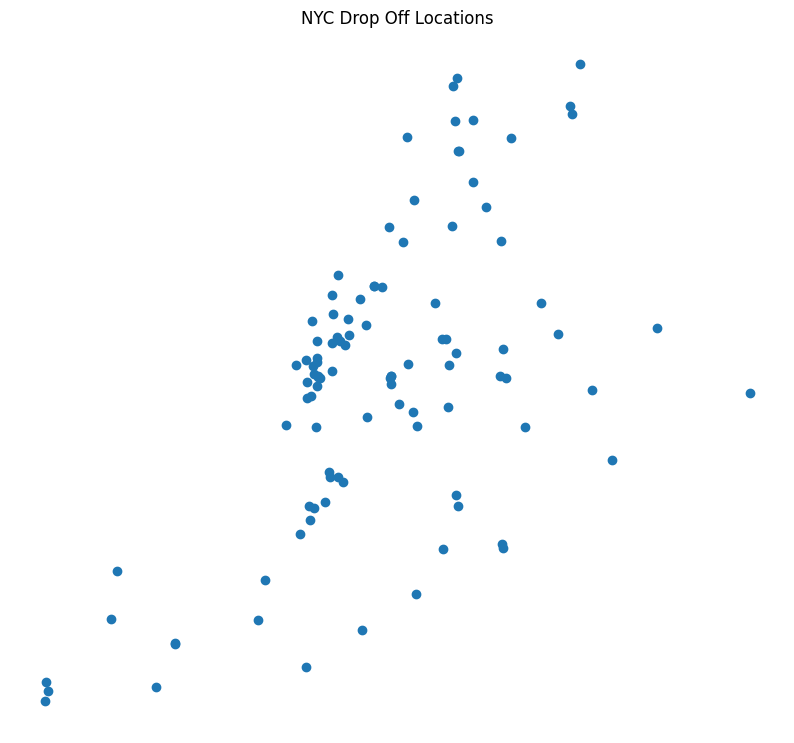

In [114]:
nycod.plot(figsize=(10, 10)).set_axis_off()
plt.title("NYC Drop Off Locations")


I would like to revist this in the future and give it a better backdrop so that more context could give better understanding. I would also like to give a unique color to each dot depending on the buroough it was in.